<a href="https://colab.research.google.com/github/quimmedes/Asas-Celere/blob/main/StableDiffusionSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [ ]:
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

In [ ]:
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

In [6]:
import os
from PIL import Image, ImageDraw
import cv2
import numpy as np
from IPython.display import HTML
from base64 import b64encode

import torch
from torch import autocast
from torch.nn import functional as F
from diffusers import StableDiffusionPipeline, AutoencoderKL
from diffusers import UNet2DConditionModel, PNDMScheduler, LMSDiscreteScheduler
from diffusers.schedulers.scheduling_ddim import DDIMScheduler
from transformers import CLIPTextModel, CLIPTokenizer
from tqdm.auto import tqdm
from huggingface_hub import notebook_login
from google.colab import output

device = 'cuda'

output.enable_custom_widget_manager()
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4', revision='fp16',
    torch_dtype=torch.float16, use_auth_token=True)
pipe = pipe.to(device)

0it [00:00, ?it/s]

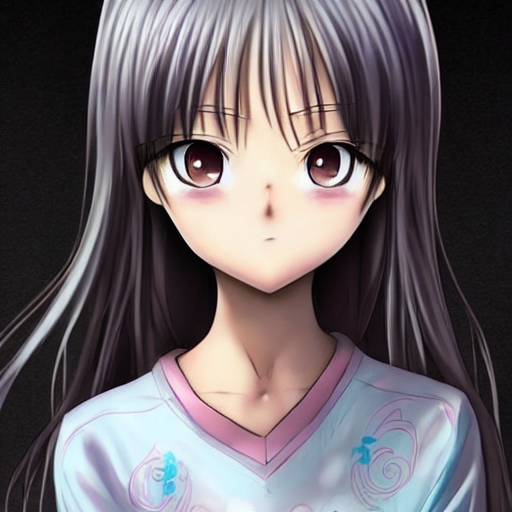

In [ ]:
prompt = 'Cute Anime Girl by Eiichiro Oda digital art HD super high detailed 8k intricate detailed face hyper realistic trending on artstation'
with autocast(device):
  image = pipe(prompt)['sample'][0]
image

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

0it [00:00, ?it/s]

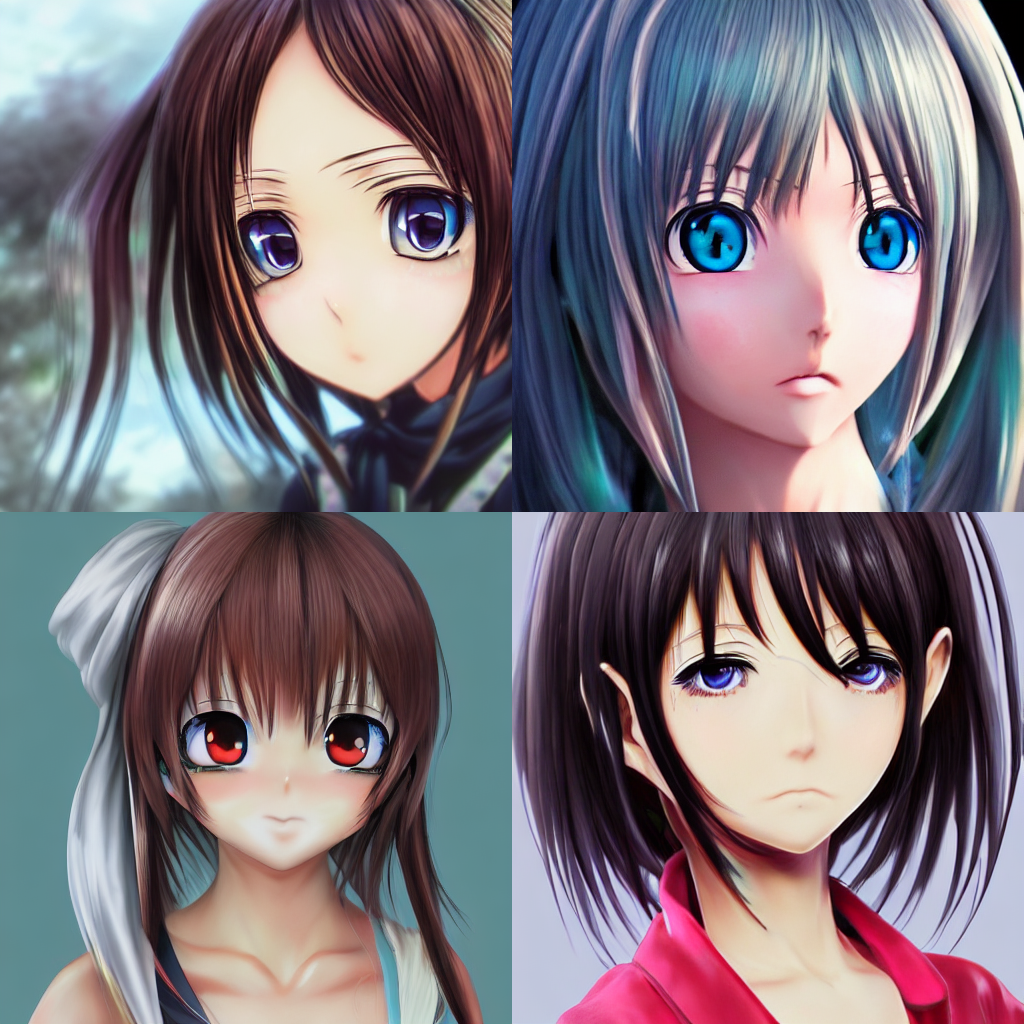

In [ ]:
n_images = 4
prompts = ['Cute Anime Girl detailed face by Eiichiro Oda digital art HD super high detailed 8k intricate hyper realistic unreal engine trending on artstation'] * n_images
with autocast(device):
  images = pipe(prompts, num_interference_steps=50)['sample']
image_grid(images, rows=2, cols=2)

In [1]:
n_images = 4
prompts = ['Cute Anime Girl by Eiichiro Oda digital art HD super high detailed 8k intricate hyper realistic unreal engine detailed face trending on artstation'] * n_images
with autocast(device):
  images = pipe(prompts, num_interference_steps=50)['sample']
image_grid(images, rows=2, cols=2)

NameError: ignored